In [1]:
#import the libaries  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics

import dask.dataframe as dd
import os      #to deal with directory 
from tqdm import tqdm

#set some options of pd 
pd.options.display.max_columns = 1000     #toshow all the columns
pd.options.display.max_rows = 1000    #toshow all the rows
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) # to round

PATH = 'DOB_Permit_Issuance.csv'


In [2]:
#the first problem that i faced is the size of the file so 
#i could not import it in one time i had to divided to churnks each one 
#contain 75000 row and then concaten them again in one dataset 

In [3]:
# use subprocess to get the the rows number 
import subprocess

def file_len(fname):
    p = subprocess.Popen(['wc', '-l', fname], stdout=subprocess.PIPE, 
                                              stderr=subprocess.PIPE)
    result, err = p.communicate()
    if p.returncode != 0:
        raise IOError(err)
    return int(result.strip().split()[0])+1

n_rows = file_len(PATH)
print (f'Exact number of rows: {n_rows}')

Exact number of rows: 3510725


In [4]:
churnk_size = 750000
df_list = [] # list to hold the churnks

for i in tqdm(pd.read_csv(PATH, chunksize=churnk_size)):
    df_list.append(i) 

0it [00:00, ?it/s]C:\Users\arsany\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (9,15,31,34,35,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
1it [00:11, 11.68s/it]C:\Users\arsany\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (9,31,34,35,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
2it [00:23, 11.73s/it]C:\Users\arsany\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (15,31,35,36,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
3it [00:37, 12.50s/it]C:\Users\arsany\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (8,9,10,15,35,51) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(

In [5]:
# Merge all dataframes into one dataframe
all_data = pd.concat(df_list)

# Delete the dataframe list to release memory
del df_list



In [6]:
#print the shapes of the data
print("the shape of train is :",all_data.shape)
#we have 3510723 with 60 features we have types of int64,float64 and object types
#we can divide features to owner info()
# See what we have loaded
all_data.info()
#we have 3510723 with 60 features we have types of int64,float64 and object types
#we can divide features to owner info()

the shape of train is : (3510723, 60)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510723 entries, 0 to 3510722
Data columns (total 60 columns):
BOROUGH                             object
Bin #                               object
House #                             object
Street Name                         object
Job #                               int64
Job doc. #                          int64
Job Type                            object
Self_Cert                           object
Block                               object
Lot                                 object
Community Board                     object
Zip Code                            float64
Bldg Type                           float64
Residential                         object
Special District 1                  object
Special District 2                  object
Work Type                           object
Permit Status                       object
Filing Status                       object
Permit Type                     

In [7]:
#print the columns of the columns
print("the columns of the training are :",all_data.columns)

the columns of the training are : Index(['BOROUGH', 'Bin #', 'House #', 'Street Name', 'Job #', 'Job doc. #',
       'Job Type', 'Self_Cert', 'Block', 'Lot', 'Community Board', 'Zip Code',
       'Bldg Type', 'Residential', 'Special District 1', 'Special District 2',
       'Work Type', 'Permit Status', 'Filing Status', 'Permit Type',
       'Permit Sequence #', 'Permit Subtype', 'Oil Gas', 'Site Fill',
       'Filing Date', 'Issuance Date', 'Expiration Date', 'Job Start Date',
       'Permittee's First Name', 'Permittee's Last Name',
       'Permittee's Business Name', 'Permittee's Phone #',
       'Permittee's License Type', 'Permittee's License #',
       'Act as Superintendent', 'Permittee's Other Title', 'HIC License',
       'Site Safety Mgr's First Name', 'Site Safety Mgr's Last Name',
       'Site Safety Mgr Business Name', 'Superintendent First & Last Name',
       'Superintendent Business Name', 'Owner's Business Type', 'Non-Profit',
       'Owner's Business Name', 'Owner's F

In [8]:
# see the tails and columns to make sence of the data
print(all_data.head())
print(all_data.tail())

    BOROUGH    Bin # House #       Street Name      Job #  Job doc. #  \
0  BROOKLYN  3052111     357  JEFFERSON AVENUE  321452432           1   
1     BRONX  2007654    1985    CRESTON AVENUE  240209038           1   
2     BRONX  2007654    1985    CRESTON AVENUE  240209038           1   
3    QUEENS  4050421   62-60       99TH STREET  440531293           1   
4     BRONX  2007668    2042     MORRIS AVENUE  240209065           1   

  Job Type Self_Cert Block Lot Community Board  Zip Code  Bldg Type  \
0       A2         Y  1830  73         303.000 11221.000      2.000   
1       A2         Y  2807  22         205.000 10453.000      2.000   
2       A2         Y  2807  22         205.000 10453.000      2.000   
3       A2         Y  2086  40         406.000 11374.000      2.000   
4       A2         Y  2807  56         205.000 10453.000      2.000   

  Residential Special District 1 Special District 2 Work Type Permit Status  \
0         YES                NaN                NaN    

3510722  Briarwood-Jamaica Hills  


In [9]:
#dived the data to numerical and catograical variables 
#numerical features are not provide important data it is al most some ids and zip codes and caterical data presented by numbers 
#so almost our work and the answers to our questions will be using the catorical ones 
numerical = all_data.dtypes[all_data.dtypes != object].index.tolist()
catagorical = all_data.dtypes[all_data.dtypes == object].index.tolist()
print("Numerical : \n" + str(numerical) + "\n")
print("catagorical: " + str(catagorical))

Numerical : 
['Job #', 'Job doc. #', 'Zip Code', 'Bldg Type', 'Permit Sequence #', 'PERMIT_SI_NO', 'LATITUDE', 'LONGITUDE', 'COUNCIL_DISTRICT', 'CENSUS_TRACT']

catagorical: ['BOROUGH', 'Bin #', 'House #', 'Street Name', 'Job Type', 'Self_Cert', 'Block', 'Lot', 'Community Board', 'Residential', 'Special District 1', 'Special District 2', 'Work Type', 'Permit Status', 'Filing Status', 'Permit Type', 'Permit Subtype', 'Oil Gas', 'Site Fill', 'Filing Date', 'Issuance Date', 'Expiration Date', 'Job Start Date', "Permittee's First Name", "Permittee's Last Name", "Permittee's Business Name", "Permittee's Phone #", "Permittee's License Type", "Permittee's License #", 'Act as Superintendent', "Permittee's Other Title", 'HIC License', "Site Safety Mgr's First Name", "Site Safety Mgr's Last Name", 'Site Safety Mgr Business Name', 'Superintendent First & Last Name', 'Superintendent Business Name', "Owner's Business Type", 'Non-Profit', "Owner's Business Name", "Owner's First Name", "Owner's Last 

In [10]:
# see the distriution of each variable in numerical and try to get some information 
all_data[numerical].describe()

,Job #,Job doc. #,Zip Code,Bldg Type,Permit Sequence #,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT
count,3510723.000,3510723.000,3508498.000,3456246.000,3510723.000,3510723.000,3498438.000,3498438.000,3498438.000,3498438.000
mean,252125096.076,1.116,10636.985,1.759,1.488,1831933.787,40.725,-73.946,20.113,6392.224
std,135186568.803,0.410,600.099,0.428,1.150,1028744.276,0.073,0.084,16.355,21249.441
min,100030011.000,1.000,0.000,1.000,1.000,10.000,40.499,-74.255,1.000,1.000
25%,120413098.000,1.000,10022.000,2.000,1.000,951493.500,40.684,-73.989,4.000,96.000
50%,240188872.000,1.000,10457.000,2.000,1.000,1836651.000,40.737,-73.962,18.000,216.000
75%,400512329.500,1.000,11226.000,2.000,2.000,2720286.500,40.766,-73.905,34.000,723.000
max,540162866.000,12.000,11697.000,2.000,29.000,3611952.000,40.914,-73.700,51.000,157903.000


In [11]:
#check the catgorical data to check what is going on and get some information
all_data[catagorical].describe(include=['O'])

,BOROUGH,Bin #,House #,Street Name,Job Type,Self_Cert,Block,Lot,Community Board,Residential,Special District 1,Special District 2,Work Type,Permit Status,Filing Status,Permit Type,Permit Subtype,Oil Gas,Site Fill,Filing Date,Issuance Date,Expiration Date,Job Start Date,Permittee's First Name,Permittee's Last Name,Permittee's Business Name,Permittee's Phone #,Permittee's License Type,Permittee's License #,Act as Superintendent,Permittee's Other Title,HIC License,Site Safety Mgr's First Name,Site Safety Mgr's Last Name,Site Safety Mgr Business Name,Superintendent First & Last Name,Superintendent Business Name,Owner's Business Type,Non-Profit,Owner's Business Name,Owner's First Name,Owner's Last Name,Owner's House #,Owner's House Street Name,Owner’s House City,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,NTA_NAME
count,3510723,3510723,3510719,3510719,3510723,2236685,3510224,3510215,3505965.000,1369942,387428,68732,2900589,3499917,3510723,3510722,2116491,38155,3092889,3510722,3490754,3499577,3510693,3494990,3494974,3461853,3494759,3241640,3272017.000,1596133,271390,30426,26419,26443,17753,1693531,1660720,3346134,3350223,2794507,3508865,3509170,3509598,3509354,3510017,3510044,3504548.000,3461683,3510723,3498438
unique,5,384072,33559,27109,6,5,21598,3012,222.000,1,95,8,13,4,2,8,15,2,5,8460,8458,11149,9562,38240,90848,362943,172012,12,60050.000,2,3172,5706,665,1608,1615,157438,309848,14,4,469357,93580,170213,40325,135057,12636,57,11699.000,456902,450,194
top,MANHATTAN,1015862,1,BROADWAY,A2,Y,16,1,105.000,YES,MID,IBZ,OT,ISSUED,INITIAL,EW,OT,OIL,NONE,03/29/2017 12:00:00 AM,03/29/2017 12:00:00 AM,12/31/2007 12:00:00 AM,06/27/2008 12:00:00 AM,JOHN,SINGH,EVEREST SCAFFOLDING INC,2124816100,GC,0.000,Y,GC,0,ADMINISTRATIVE,WAIVER,NYC DEPT. OF BUILDINGS,JOHN WHITE,ROCKLEDGE SCAFFOLD,CORPORATION,N,NY SCHOOL CONSTRUCTION AUTHORITY,MICHAEL,SINGH,100,BROADWAY,NEW YORK,NY,10022.000,7184728000,11/03/2017 12:00:00 AM,Midtown-Midtown South
freq,1463064,3200,27660,96985,2096225,1527271,10595,369629,336379.000,1369942,96507,27903,987576,3435533,2561033,1553284,920715,35489,1578751,1087,1096,18761,1519,145762,53837,13468,12799,2080542,62637.000,1587877,105976,788,1446,1446,1448,13457,6847,1130921,3135625,26735,81333,32544,86235,85921,967794,3415338,88845.000,15610,3236671,256351


In [12]:
#the intial info that we can get:
#the most work is taking place in MANHATTAN:1463064 so we need to see how much work in each 5 BOROUGH?
#the most work is taking place in BROADWAY:96985 so we need to see how much work in each street and what the hot streetes in each 5 BOROUGH?
#in job's titles we can see the most wanted job :A2 and ask why?,see what job is the most wanted in each street and in each BOROUGH and ask why?

# This means these professionals can certify that the plans they are filing with the Department of Buildings are in compliance with applicable laws. 
#Plans that are self-certified or professionally certified do not have to be certified by the city for approval, 
#which, of course, can take tim the majority of the known Self_Cert is yes, there are too much missining data in that column which 
#we need to know why these m issing data,ask these question regrading to the each BOROUGH

# for building types: the  majority is Residential, 1369942
#Work Type:there are some missing data we should ask why?/the majority OT:987576 -Other Constuction Equipment
#we should see the pattern for each Work Type and tie that with each BOROUGH

#Community Board:3-digit identifier: Borough code = first position, last 2 = community board so we should seprete the community board and see the frequancy
#for each community board


#Permit Status:ISSUED is the most one ,see the pattern for each BOROUGH,street see why and why not the permitte issued or no
#Permit Filing Status:the most one is INITIAL:2561033 see the pattern ,
#Permit Type:EW:1553284 tie this with Work Type and Permit Subtype 


# regarding to the dates:
    #1-Filing Date - Issuance Date = how long does it take from filling to issued and see this regrading to each worktype and Permit Type in each BOROUGH and in each location and ask why
    #2-Expiration Date - Issuance Date = to see how long each permitt should take 
    #3-how long does it take from issused to strat Job Start Date and see why?
    
    # we can see the seasion for each job and tie that with the weather 
    
    
    #Filing Date:03/29/2017 12:00:00 AM:1087   why?  for each day 
    #Issuance Date:03/29/2017 12:00:00 AM :1096  why?
    #Expiration Date :12/31/2007 12:00:00 AM:18761  why?
    
    # is there any missing dates? why?
    
#check if there any event happened or weather crises or any thing like that might cause 
#any damage and related that to these dates 
    
    

# we could combine frirst an la st in the same column to be easy to work 
#Permittee's First Name	Permittee's Last Name,Permittee's Phone # are the most requent name we can see is that the same person 
#Permittee's Business Name:EVEREST SCAFFOLDING INC the most company that take permitte:13468 see the most companties that takes works
#Permittee's License Type: we can infer what compies what in what job and what it good at use this and tie this with the permmit type 
#Act as Superintendent: which commpani work as Superintendent

#Site Safety Mgr's: are all the locaction has Site Safety Mgr and what can infre from that about 
#about how large is the project, is there any BOROUGH say must have a site safety manger


#Superintendent Business Name:which is ROCKLEDGE SCAFFOLD:6847 from 309848
#Owner's Business Type:need to see the pattern for each type 
#Non-Profit almost are comerical:3135625 and there are some missing data 
#Owner's Business Name:NY SCHOOL CONSTRUCTION AUTHORITY 26735
     #and regrading to that we can ask a lot of questions:
            #1- what type of jobs new buildings or renew and see that in each BOROUGH
            # is there  a apasific company that they work with
            #what type of permites and jobs 
            # is there a spaqsific seasion they are working on? look at that regrading to
            #school seasion 

#Owner's Phone #:15610 for the same Owner's House  see the last and the first name and ask why 
# if there some one how owns alot of houses 
#NTA_NAME:194 the most one Midtown-Midtown South:256351




In [13]:
#convert any infinty value to nan
all_data = all_data.replace([np.inf, -np.inf], np.nan)

In [14]:
#start preparing for the dealing with missing data
# info shows alot of missing values is some places >>> so go to description to check them
# diffrent data types dtypes: float64(3), int64(35), object(43)
print(all_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510723 entries, 0 to 3510722
Data columns (total 60 columns):
BOROUGH                             object
Bin #                               object
House #                             object
Street Name                         object
Job #                               int64
Job doc. #                          int64
Job Type                            object
Self_Cert                           object
Block                               object
Lot                                 object
Community Board                     object
Zip Code                            float64
Bldg Type                           float64
Residential                         object
Special District 1                  object
Special District 2                  object
Work Type                           object
Permit Status                       object
Filing Status                       object
Permit Type                         object
Permit Sequence #          

In [15]:
#shows the number of missing data a
miss = all_data.isnull().sum()
miss = miss[miss > 0]
miss.sort_values()
print("the missing values in each colunm:", miss)

the missing values in each colunm: House #                                   4
Street Name                               4
Self_Cert                           1274038
Block                                   499
Lot                                     508
Community Board                        4758
Zip Code                               2225
Bldg Type                             54477
Residential                         2140781
Special District 1                  3123295
Special District 2                  3441991
Work Type                            610134
Permit Status                         10806
Permit Type                               1
Permit Subtype                      1394232
Oil Gas                             3472568
Site Fill                            417834
Filing Date                               1
Issuance Date                         19969
Expiration Date                       11146
Job Start Date                           30
Permittee's First Name                157

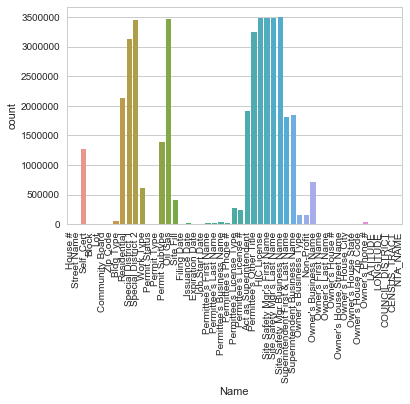

In [16]:
#visulize the missing data
#visualising missing values
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
plt.show()

In [17]:
#check missing in numerical and catogrical
#printing the missing values column and how man
print("Missing in numerical\n")
for col in numerical:
    if (all_data[col].isnull().sum() > 0):
        print(col,all_data[col].isnull().sum())
        
print("\nMissing in catagorical\n")
for col2 in catagorical:
    if (all_data[col2].isnull().sum() > 0):
        print(col2,all_data[col2].isnull().sum())


Missing in numerical

Zip Code 2225
Bldg Type 54477
LATITUDE 12285
LONGITUDE 12285
COUNCIL_DISTRICT 12285
CENSUS_TRACT 12285

Missing in catagorical

House # 4
Street Name 4
Self_Cert 1274038
Block 499
Lot 508
Community Board 4758
Residential 2140781
Special District 1 3123295
Special District 2 3441991
Work Type 610134
Permit Status 10806
Permit Type 1
Permit Subtype 1394232
Oil Gas 3472568
Site Fill 417834
Filing Date 1
Issuance Date 19969
Expiration Date 11146
Job Start Date 30
Permittee's First Name 15733
Permittee's Last Name 15749
Permittee's Business Name 48870
Permittee's Phone # 15964
Permittee's License Type 269083
Permittee's License # 238706
Act as Superintendent 1914590
Permittee's Other Title 3239333
HIC License 3480297
Site Safety Mgr's First Name 3484304
Site Safety Mgr's Last Name 3484280
Site Safety Mgr Business Name 3492970
Superintendent First & Last Name 1817192
Superintendent Business Name 1850003
Owner's Business Type 164589
Non-Profit 160500
Owner's Business Nam

MANHATTAN        1463064
BROOKLYN          814731
QUEENS            731738
BRONX             296712
STATEN ISLAND     204478
Name: BOROUGH, dtype: int64


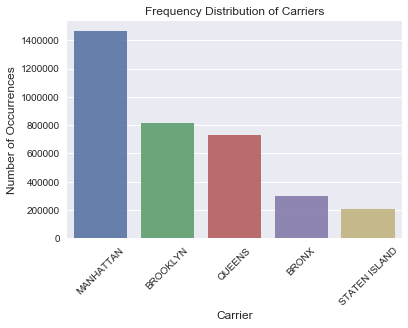

In [18]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
BOROUGH_count = all_data['BOROUGH'].value_counts()
print(BOROUGH_count)
sns.set(style="darkgrid")
sns.barplot(BOROUGH_count.index, BOROUGH_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=45)
plt.show()
#this the answer for the first qusetion the order of the BOROUGHin this database 
#looking at the tepography of newyour city the area and popluation, and building densty that make sence

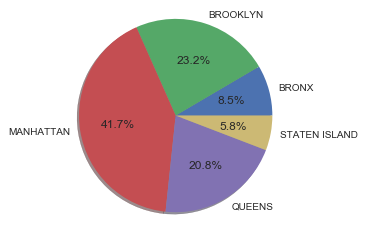

In [19]:
labels = all_data['BOROUGH'].astype('category').cat.categories.tolist()
counts = all_data['BOROUGH'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

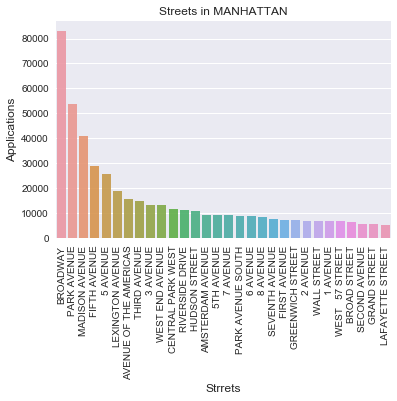

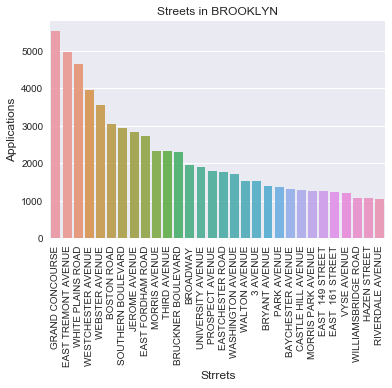

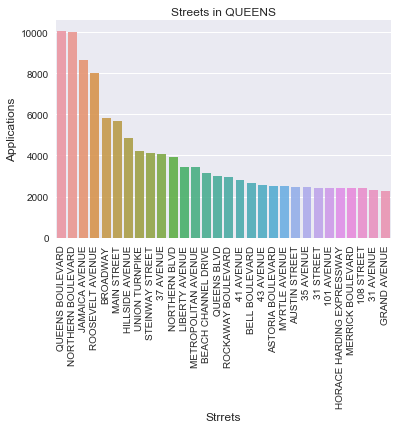

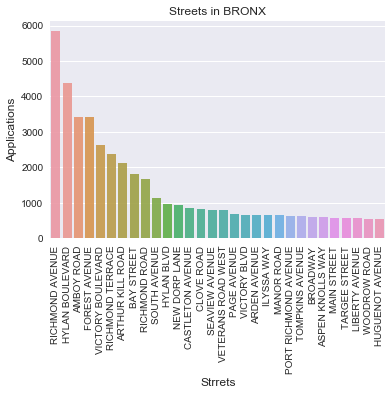

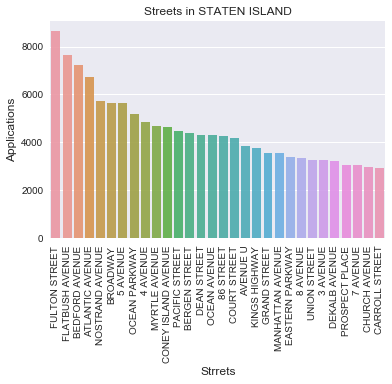

In [49]:
%matplotlib inline
sns.set() #rescue matplotlib's styles from the early '90s
#ff=all_data.groupby('BOROUGH')['Street Name'].value_counts()
man=all_data['Street Name'].loc[all_data['BOROUGH'] == "MANHATTAN"].value_counts().head(30)
broo=all_data['Street Name'].loc[all_data['BOROUGH'] == "BROOKLYN"].value_counts().head(30)
queen=all_data['Street Name'].loc[all_data['BOROUGH'] == "QUEENS"].value_counts().head(30)
bro=all_data['Street Name'].loc[all_data['BOROUGH'] == "BRONX"].value_counts().head(30)
stat=all_data['Street Name'].loc[all_data['BOROUGH'] == "STATEN ISLAND"].value_counts().head(30)

sns.set(style="darkgrid")
sns.barplot(man.index, man.values, alpha=0.9)
plt.title('Streets in MANHATTAN')
plt.ylabel('Applications', fontsize=12)
plt.xlabel('Strrets', fontsize=12)
plt.xticks(rotation=90)
plt.show()

sns.set(style="darkgrid")
sns.barplot(bro.index, bro.values, alpha=0.9)
plt.title('Streets in BROOKLYN')
plt.ylabel('Applications', fontsize=12)
plt.xlabel('Strrets', fontsize=12)
plt.xticks(rotation=90)
plt.show()

sns.set(style="darkgrid")
sns.barplot(queen.index, queen.values, alpha=0.9)
plt.title('Streets in QUEENS')
plt.ylabel('Applications', fontsize=12)
plt.xlabel('Strrets', fontsize=12)
plt.xticks(rotation=90)
plt.show()

sns.set(style="darkgrid")
sns.barplot(stat.index, stat.values, alpha=0.9)
plt.title('Streets in BRONX')
plt.ylabel('Applications', fontsize=12)
plt.xlabel('Strrets', fontsize=12)
plt.xticks(rotation=90)
plt.show()

sns.set(style="darkgrid")
sns.barplot(broo.index, broo.values, alpha=0.9)
plt.title('Streets in STATEN ISLAND')
plt.ylabel('Applications', fontsize=12)
plt.xlabel('Strrets', fontsize=12)
plt.xticks(rotation=90)
plt.show()

A2    2096225
NB     492067
A3     384918
A1     371700
DM      90085
SG      75728
Name: Job Type, dtype: int64


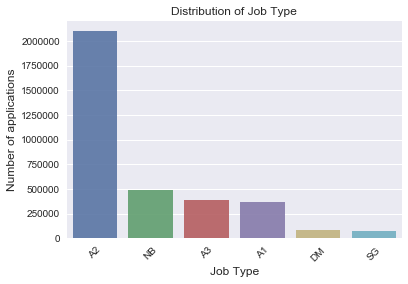

In [50]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
job = all_data['Job Type'].value_counts()
print(job)
sns.set(style="darkgrid")
sns.barplot(job.index, job.values, alpha=0.9)
plt.title('Distribution of Job Type')
plt.ylabel('Number of applications', fontsize=12)
plt.xlabel('Job Type', fontsize=12)
plt.xticks(rotation=45)
plt.show()

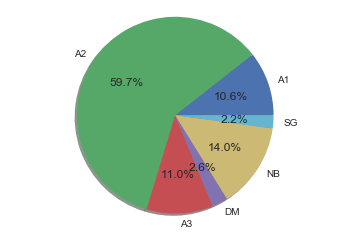

In [22]:
labels = all_data['Job Type'].astype('category').cat.categories.tolist()
counts = all_data['Job Type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

MANHATTAN        1463064
BROOKLYN          814731
QUEENS            731738
BRONX             296712
STATEN ISLAND     204478
Name: BOROUGH, dtype: int64


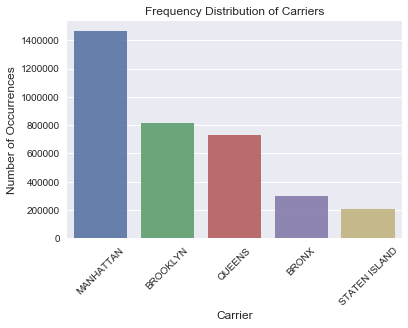

A2    1130155
A3     183968
A1      78787
SG      30381
NB      29603
DM      10170
Name: Job Type, dtype: int64
A2    418106
NB    148919
A1    117432
A3     86577
DM     29012
SG     14685
Name: Job Type, dtype: int64
A2    332528
NB    157116
A1    125920
A3     67368
DM     30929
SG     17877
Name: Job Type, dtype: int64
A2    153203
NB     64933
A3     36837
A1     25922
SG      8012
DM      7805
Name: Job Type, dtype: int64
NB    91496
A2    62233
A1    23639
DM    12169
A3    10168
SG     4773
Name: Job Type, dtype: int64


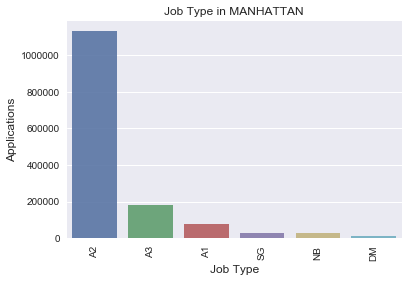

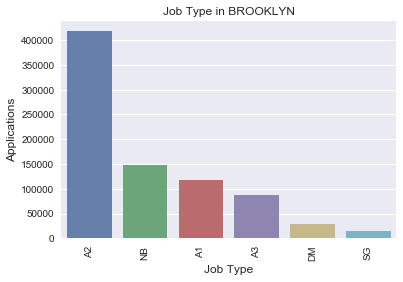

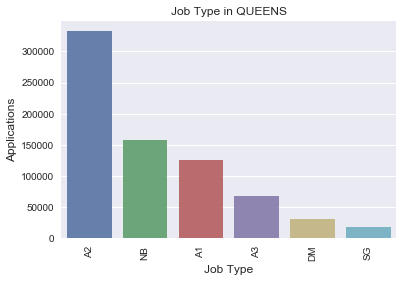

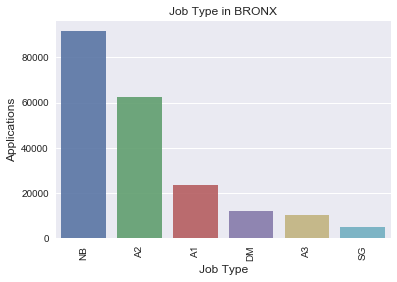

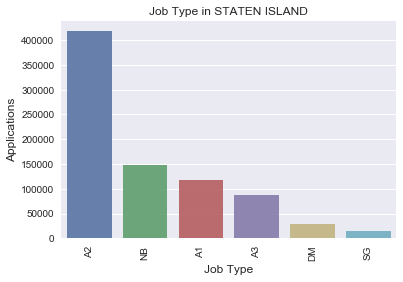

In [53]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
BOROUGH_count = all_data['BOROUGH'].value_counts()
print(BOROUGH_count)
sns.set(style="darkgrid")
sns.barplot(BOROUGH_count.index, BOROUGH_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=45)
plt.show()









%matplotlib inline
sns.set() #rescue matplotlib's styles from the early '90s
#ff=all_data.groupby('BOROUGH')['Street Name'].value_counts()
man=all_data['Job Type'].loc[all_data['BOROUGH'] == "MANHATTAN"].value_counts().head(30)
broo=all_data['Job Type'].loc[all_data['BOROUGH'] == "BROOKLYN"].value_counts().head(30)
queen=all_data['Job Type'].loc[all_data['BOROUGH'] == "QUEENS"].value_counts().head(30)
bro=all_data['Job Type'].loc[all_data['BOROUGH'] == "BRONX"].value_counts().head(30)
stat=all_data['Job Type'].loc[all_data['BOROUGH'] == "STATEN ISLAND"].value_counts().head(30)
#for MANHATTAN the most work is happing in 
print(man)
print(broo)
print(queen)
print(bro)
print(stat)

sns.set(style="darkgrid")
sns.barplot(man.index, man.values, alpha=0.9)
plt.title('Job Type in MANHATTAN')
plt.ylabel('Applications', fontsize=12)
plt.xlabel('Job Type', fontsize=12)
plt.xticks(rotation=90)
plt.show()
sns.set(style="darkgrid")
sns.barplot(broo.index, broo.values, alpha=0.9)
plt.title('Job Type in BROOKLYN')
plt.ylabel('Applications', fontsize=12)
plt.xlabel('Job Type', fontsize=12)
plt.xticks(rotation=90)
plt.show()
sns.set(style="darkgrid")
sns.barplot(queen.index, queen.values, alpha=0.9)
plt.title('Job Type in QUEENS')
plt.ylabel('Applications', fontsize=12)
plt.xlabel('Job Type', fontsize=12)
plt.xticks(rotation=90)
plt.show()
sns.set(style="darkgrid")
sns.barplot(stat.index, stat.values, alpha=0.9)
plt.title('Job Type in BRONX')
plt.ylabel('Applications', fontsize=12)
plt.xlabel('Job Type', fontsize=12)
plt.xticks(rotation=90)
plt.show()
sns.set(style="darkgrid")
sns.barplot(broo.index, broo.values, alpha=0.9)
plt.title('Job Type in STATEN ISLAND')
plt.ylabel('Applications', fontsize=12)
plt.xlabel('Job Type', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Y    1527271
N     709396
R         11
X          4
J          3
Name: Self_Cert, dtype: int64


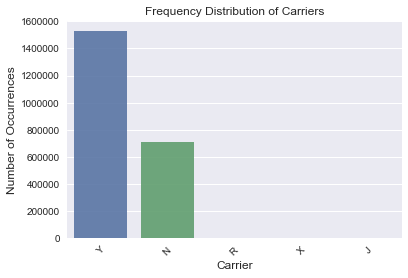

Y    632364
N    268067
Name: Self_Cert, dtype: int64
Y    322980
N    200518
R        11
Name: Self_Cert, dtype: int64
Y    315432
N    163654
X         1
Name: Self_Cert, dtype: int64
Y    131091
N     44961
X         3
Name: Self_Cert, dtype: int64
Y    125404
N     32196
J         3
Name: Self_Cert, dtype: int64


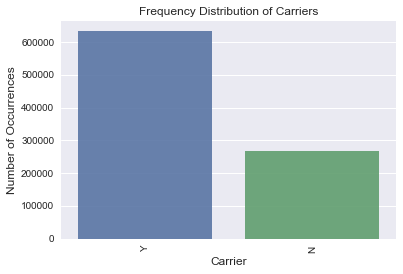

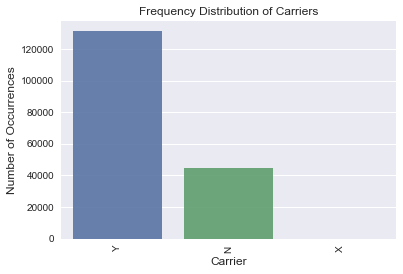

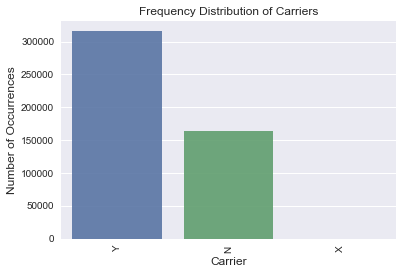

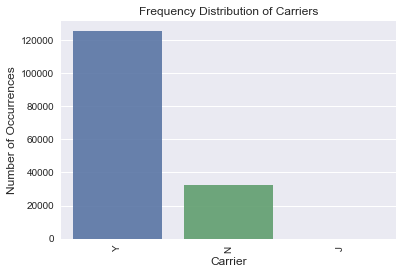

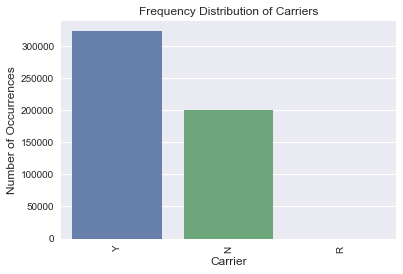

In [24]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
BOROUGH_count = all_data['Self_Cert'].value_counts()
print(BOROUGH_count)
sns.set(style="darkgrid")


sns.barplot(BOROUGH_count.index, BOROUGH_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=45)
plt.show()




%matplotlib inline
sns.set() #rescue matplotlib's styles from the early '90s
#ff=all_data.groupby('BOROUGH')['Street Name'].value_counts()
man=all_data['Self_Cert'].loc[all_data['BOROUGH'] == "MANHATTAN"].value_counts().head(30)
broo=all_data['Self_Cert'].loc[all_data['BOROUGH'] == "BROOKLYN"].value_counts().head(30)
queen=all_data['Self_Cert'].loc[all_data['BOROUGH'] == "QUEENS"].value_counts().head(30)
bro=all_data['Self_Cert'].loc[all_data['BOROUGH'] == "BRONX"].value_counts().head(30)
stat=all_data['Self_Cert'].loc[all_data['BOROUGH'] == "STATEN ISLAND"].value_counts().head(30)
#for MANHATTAN the most work is happing in 
print(man)
print(broo)
print(queen)
print(bro)
print(stat)

sns.set(style="darkgrid")
sns.barplot(man.index, man.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=90)
plt.show()
sns.set(style="darkgrid")
sns.barplot(bro.index, bro.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=90)
plt.show()
sns.set(style="darkgrid")
sns.barplot(queen.index, queen.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=90)
plt.show()
sns.set(style="darkgrid")
sns.barplot(stat.index, stat.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=90)
plt.show()
sns.set(style="darkgrid")
sns.barplot(broo.index, broo.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=90)
plt.show()







In [25]:
%matplotlib inline
sns.set() #rescue matplotlib's styles from the early '90s
#ff=all_data.groupby('BOROUGH')['Street Name'].value_counts()
a2=all_data['Self_Cert'].loc[all_data['Job Type']  == "A2"].value_counts()
a3=all_data['Self_Cert'].loc[all_data['Job Type']  == "A3"].value_counts()
a1=all_data['Self_Cert'].loc[all_data['Job Type']  == "A1"].value_counts()
nb=all_data['Self_Cert'].loc[all_data['Job Type']  == "NB"].value_counts()
dm=all_data['Self_Cert'].loc[all_data['Job Type']  == "DM"].value_counts()
sg=all_data['Self_Cert'].loc[all_data['Job Type']  == "SG"].value_counts()

#for MANHATTAN the most work is happing in 
print(a2)
print(a3)
print(a1)
print(nb)
print(dm)
print(sg)

Y    971223
N    409945
Name: Self_Cert, dtype: int64
Y    240317
N     29441
Name: Self_Cert, dtype: int64
N    109399
Y    102100
Name: Self_Cert, dtype: int64
Y    181400
N    120759
R        11
X         4
J         3
Name: Self_Cert, dtype: int64
N    33205
Y      375
Name: Self_Cert, dtype: int64
Y    31856
N     6647
Name: Self_Cert, dtype: int64


OT    987576
PL    704947
EQ    541341
MH    317927
SP    125890
BL     68943
FP     62110
FB     38910
FS     22562
SD     18797
CC     11341
FA       244
NB         1
Name: Work Type, dtype: int64


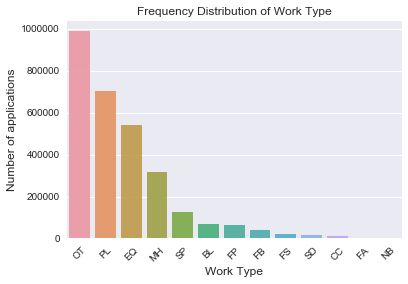

In [54]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
BOROUGH_count = all_data['Work Type'].value_counts()
print(BOROUGH_count)
sns.set(style="darkgrid")
sns.barplot(BOROUGH_count.index, BOROUGH_count.values, alpha=0.9)
plt.title('Frequency Distribution of Work Type')
plt.ylabel('Number of applications', fontsize=12)
plt.xlabel('Work Type', fontsize=12)
plt.xticks(rotation=45)
plt.show()

OT    525448
PL    263479
EQ    198569
MH    198019
SP     86384
BL     25775
FP     23990
FB     14706
SD     11508
FS      8591
CC       741
FA        67
Name: Work Type, dtype: int64
OT    192822
PL    167536
EQ    152509
MH     53181
BL     20573
SP     18169
FP     14687
FB      9538
FS      4622
CC      3982
SD      3430
FA        27
Name: Work Type, dtype: int64
OT    165796
PL    161447
EQ    116266
MH     41618
FP     14071
SP     13153
BL     12653
FB      7309
FS      4878
CC      4031
SD      2112
FA        74
NB         1
Name: Work Type, dtype: int64
OT    69055
PL    58452
EQ    51780
MH    18139
BL     8870
FB     6956
FP     6713
SP     5956
FS     4056
SD     1563
CC     1534
FA       62
Name: Work Type, dtype: int64
PL    54033
OT    34455
EQ    22217
MH     6970
FP     2649
SP     2228
BL     1072
CC     1053
FS      415
FB      401
SD      184
FA       14
Name: Work Type, dtype: int64


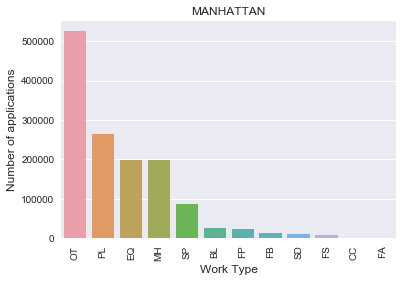

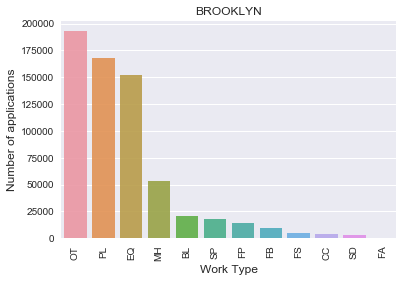

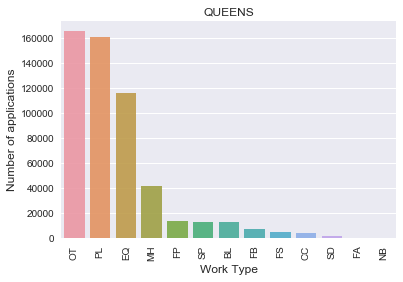

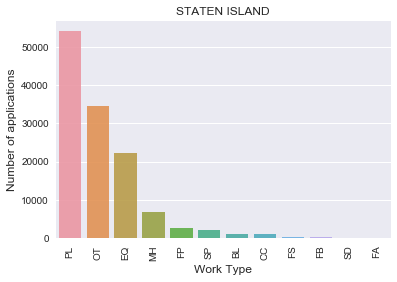

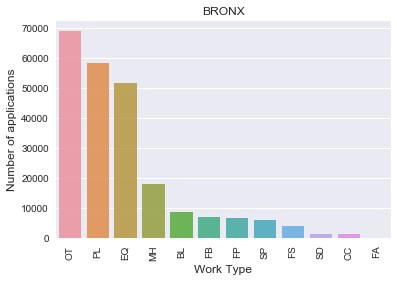

In [55]:
%matplotlib inline
sns.set() #rescue matplotlib's styles from the early '90s
#ff=all_data.groupby('BOROUGH')['Street Name'].value_counts()
man=all_data['Work Type'].loc[all_data['BOROUGH'] == "MANHATTAN"].value_counts().head(30)
broo=all_data['Work Type'].loc[all_data['BOROUGH'] == "BROOKLYN"].value_counts().head(30)
queen=all_data['Work Type'].loc[all_data['BOROUGH'] == "QUEENS"].value_counts().head(30)
bro=all_data['Work Type'].loc[all_data['BOROUGH'] == "BRONX"].value_counts().head(30)
stat=all_data['Work Type'].loc[all_data['BOROUGH'] == "STATEN ISLAND"].value_counts().head(30)
#for MANHATTAN the most work is happing in 
print(man)
print(broo)
print(queen)
print(bro)
print(stat)





sns.set(style="darkgrid")
sns.barplot(man.index, man.values, alpha=0.9)
plt.title('MANHATTAN')
plt.ylabel('Number of applications', fontsize=12)
plt.xlabel('Work Type', fontsize=12)
plt.xticks(rotation=90)
plt.show()
sns.set(style="darkgrid")
sns.barplot(broo.index, broo.values, alpha=0.9)
plt.title('BROOKLYN')
plt.ylabel('Number of applications', fontsize=12)
plt.xlabel('Work Type', fontsize=12)
plt.xticks(rotation=90)
plt.show()
sns.set(style="darkgrid")
sns.barplot(queen.index, queen.values, alpha=0.9)
plt.title('QUEENS')
plt.ylabel('Number of applications', fontsize=12)
plt.xlabel('Work Type', fontsize=12)
plt.xticks(rotation=90)
plt.show()
sns.set(style="darkgrid")
sns.barplot(stat.index, stat.values, alpha=0.9)
plt.title('STATEN ISLAND')
plt.ylabel('Number of applications', fontsize=12)
plt.xlabel('Work Type', fontsize=12)
plt.xticks(rotation=90)
plt.show()
sns.set(style="darkgrid")
sns.barplot(bro.index, bro.values, alpha=0.9)
plt.title('BRONX')
plt.ylabel('Number of applications', fontsize=12)
plt.xlabel('Work Type', fontsize=12)
plt.xticks(rotation=90)
plt.show()

ISSUED        3435533
RE-ISSUED       44355
IN PROCESS      20025
REVOKED             4
Name: Permit Status, dtype: int64


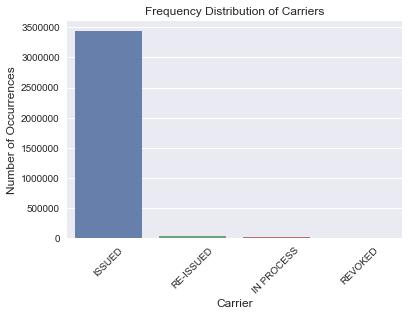

In [28]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
BOROUGH_count = all_data['Permit Status'].value_counts()
print(BOROUGH_count)
sns.set(style="darkgrid")
sns.barplot(BOROUGH_count.index, BOROUGH_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=45)
plt.show()

EW    1553284
PL     704946
EQ     541341
AL     312353
NB     227981
SG      75708
DM      50416
FO      44693
Name: Permit Type, dtype: int64


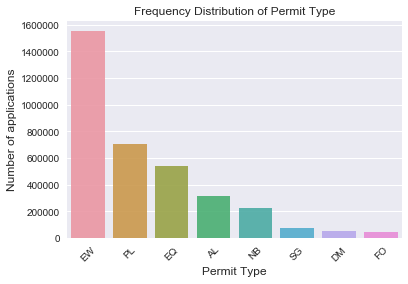

In [56]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
BOROUGH_count = all_data['Permit Type'].value_counts()
print(BOROUGH_count)
sns.set(style="darkgrid")
sns.barplot(BOROUGH_count.index, BOROUGH_count.values, alpha=0.9)
plt.title('Frequency Distribution of Permit Type')
plt.ylabel('Number of applications', fontsize=12)
plt.xlabel('Permit Type', fontsize=12)
plt.xticks(rotation=45)
plt.show()

OT    525448
PL    263479
EQ    198569
MH    198019
SP     86384
BL     25775
FP     23990
FB     14706
SD     11508
FS      8591
CC       741
FA        67
Name: Work Type, dtype: int64
OT    192822
PL    167536
EQ    152509
MH     53181
BL     20573
SP     18169
FP     14687
FB      9538
FS      4622
CC      3982
SD      3430
FA        27
Name: Work Type, dtype: int64
OT    165796
PL    161447
EQ    116266
MH     41618
FP     14071
SP     13153
BL     12653
FB      7309
FS      4878
CC      4031
SD      2112
FA        74
NB         1
Name: Work Type, dtype: int64
OT    69055
PL    58452
EQ    51780
MH    18139
BL     8870
FB     6956
FP     6713
SP     5956
FS     4056
SD     1563
CC     1534
FA       62
Name: Work Type, dtype: int64
PL    54033
OT    34455
EQ    22217
MH     6970
FP     2649
SP     2228
BL     1072
CC     1053
FS      415
FB      401
SD      184
FA       14
Name: Work Type, dtype: int64


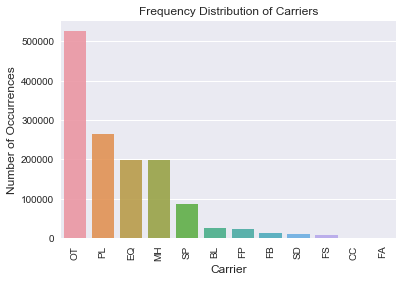

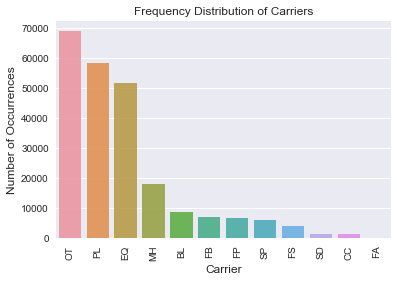

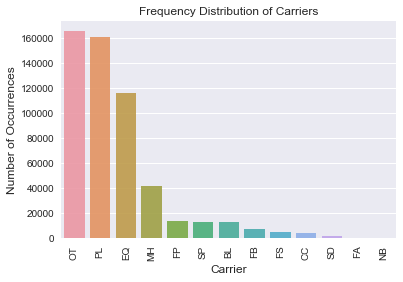

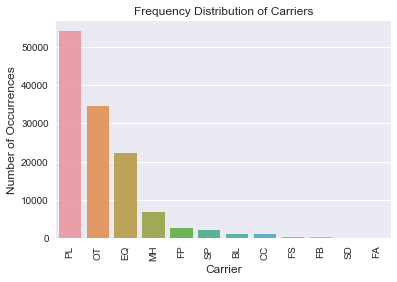

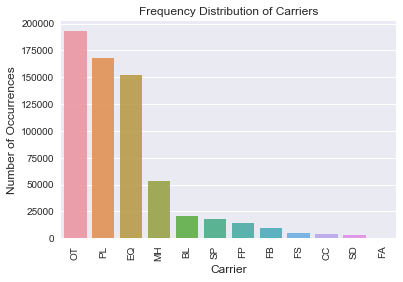

In [30]:
%matplotlib inline
sns.set() #rescue matplotlib's styles from the early '90s
#ff=all_data.groupby('BOROUGH')['Street Name'].value_counts()
man=all_data['Work Type'].loc[all_data['BOROUGH'] == "MANHATTAN"].value_counts().head(30)
broo=all_data['Work Type'].loc[all_data['BOROUGH'] == "BROOKLYN"].value_counts().head(30)
queen=all_data['Work Type'].loc[all_data['BOROUGH'] == "QUEENS"].value_counts().head(30)
bro=all_data['Work Type'].loc[all_data['BOROUGH'] == "BRONX"].value_counts().head(30)
stat=all_data['Work Type'].loc[all_data['BOROUGH'] == "STATEN ISLAND"].value_counts().head(30)
#for MANHATTAN the most work is happing in 
print(man)
print(broo)
print(queen)
print(bro)
print(stat)





sns.set(style="darkgrid")
sns.barplot(man.index, man.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=90)
plt.show()
sns.set(style="darkgrid")
sns.barplot(bro.index, bro.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=90)
plt.show()
sns.set(style="darkgrid")
sns.barplot(queen.index, queen.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=90)
plt.show()
sns.set(style="darkgrid")
sns.barplot(stat.index, stat.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=90)
plt.show()
sns.set(style="darkgrid")
sns.barplot(broo.index, broo.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [31]:
%matplotlib inline
sns.set() #rescue matplotlib's styles from the early '90s
#ff=all_data.groupby('BOROUGH')['Street Name'].value_counts()
a1=all_data['Permit Type'].loc[all_data['Work Type'] == "OT"].value_counts()
a2=all_data['Permit Type'].loc[all_data['Work Type'] == "PL"].value_counts()
a3=all_data['Permit Type'].loc[all_data['Work Type'] == "EQ"].value_counts()
a4=all_data['Permit Type'].loc[all_data['Work Type'] == "MH"].value_counts()
a5=all_data['Permit Type'].loc[all_data['Work Type'] == "SP"].value_counts()
a6=all_data['Permit Type'].loc[all_data['Work Type'] == "BL"].value_counts()
a7=all_data['Permit Type'].loc[all_data['Work Type'] == "FP"].value_counts()
a8=all_data['Permit Type'].loc[all_data['Work Type'] == "BL"].value_counts()
a9=all_data['Permit Type'].loc[all_data['Work Type'] == "FP"].value_counts()
a10=all_data['Permit Type'].loc[all_data['Work Type'] == "FB"].value_counts()
a11=all_data['Permit Type'].loc[all_data['Work Type'] == "FS"].value_counts()
a12=all_data['Permit Type'].loc[all_data['Work Type'] == "SD"].value_counts()
a13=all_data['Permit Type'].loc[all_data['Work Type'] == "CC"].value_counts()
a14=all_data['Permit Type'].loc[all_data['Work Type'] == "FA"].value_counts()
a15=all_data['Permit Type'].loc[all_data['Work Type'] == "NB"].value_counts()

print(a1)
print(a2)
print(a3)
print(a4)
print(a5)
print(a6)
print(a7)
print(a8)
print(a9)
print(a10)
print(a11)
print(a12)
print(a13)
print(a14)
print(a15)

EW    897901
AL     89675
Name: Permit Type, dtype: int64
PL    704946
Name: Permit Type, dtype: int64
EQ    541341
Name: Permit Type, dtype: int64
EW    317927
Name: Permit Type, dtype: int64
EW    125890
Name: Permit Type, dtype: int64
EW    68943
Name: Permit Type, dtype: int64
EW    62110
Name: Permit Type, dtype: int64
EW    68943
Name: Permit Type, dtype: int64
EW    62110
Name: Permit Type, dtype: int64
EW    38910
Name: Permit Type, dtype: int64
EW    22562
Name: Permit Type, dtype: int64
EW    18797
Name: Permit Type, dtype: int64
AL    11341
Name: Permit Type, dtype: int64
EW    244
Name: Permit Type, dtype: int64
NB    1
Name: Permit Type, dtype: int64


In [ ]:
from datetime import datetime

# Define dates as datetime objects
all_data['n_Issuance Date'] = pd.to_datetime(all_data['Issuance Date'])
all_data['n_Expiration Date'] = pd.to_datetime(all_data['Expiration Date'])
all_data['n_Job Start Date'] = pd.to_datetime(all_data['Job Start Date'])
all_data['n_Filing Date'] = pd.to_datetime(all_data['Filing Date'])


#all_data['diff_days']=  all_data['diff_days']/np.timedelta64(1,'D')
 
#all_data['n_Issuance Date']= pd.to_datetime(all_data['Issuance Date'], errors='coerce')


In [61]:
all_data['diff_days'] = all_data['n_Issuance Date'] - all_data['n_Filing Date']
all_data['diff_days']=  all_data['diff_days']/np.timedelta64(1,'D')

TypeError: unsupported operand type(s) for -: 'str' and 'str'

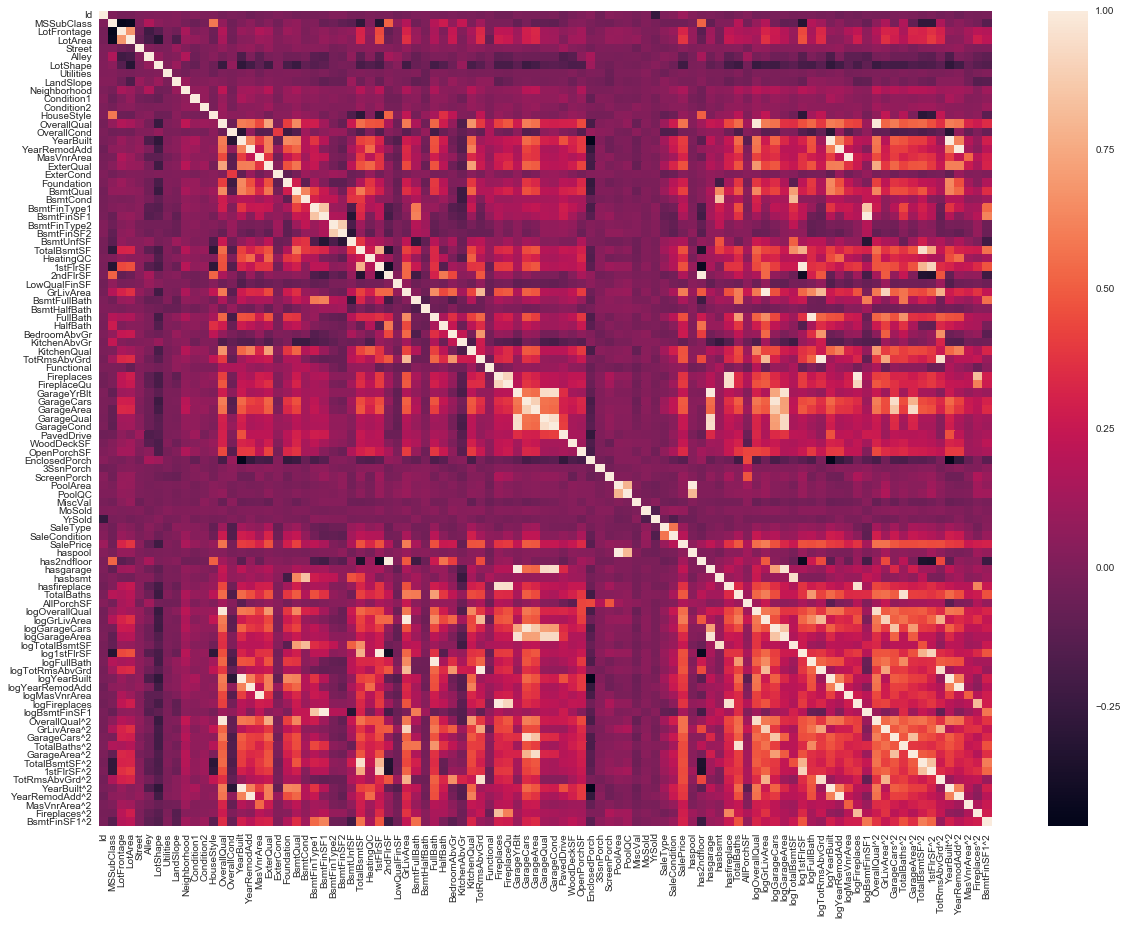

In [31]:
#start looking at the reationship between the traget and the other variables 
#using the heat map 
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(20,15))
corrmat = all_data.corr()
g = sns.heatmap(all_data.corr(),xticklabels=True, yticklabels=True)

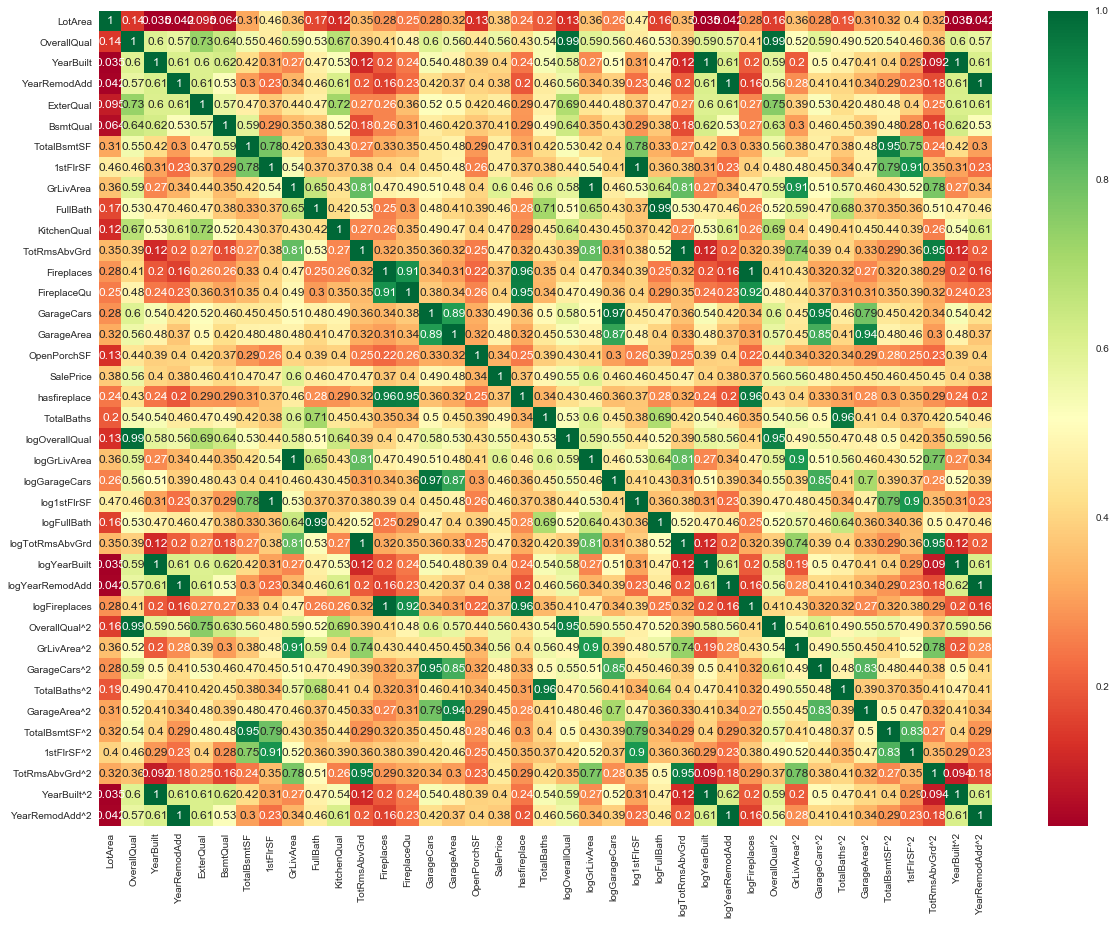

In [32]:
# most correlated features
plt.subplots(figsize=(20,15))
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.33]
g = sns.heatmap(all_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [33]:
#print the most important features compared to saleprice
print("Find most important features relative to target")
corr = all_data.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice          1.000
GrLivArea          0.598
logGrLivArea       0.597
OverallQual        0.565
OverallQual^2      0.564
GrLivArea^2        0.563
logOverallQual     0.551
GarageCars         0.493
TotalBaths         0.488
GarageArea         0.482
GarageCars^2       0.482
TotRmsAbvGrd       0.474
logTotRmsAbvGrd    0.474
KitchenQual        0.471
1stFlrSF           0.466
TotalBsmtSF        0.466
log1stFlrSF        0.465
logGarageCars      0.464
ExterQual          0.464
TotalBsmtSF^2      0.461
FullBath           0.457
TotRmsAbvGrd^2     0.452
logFullBath        0.451
TotalBaths^2       0.446
1stFlrSF^2         0.445
GarageArea^2       0.445
BsmtQual           0.411
YearBuilt^2        0.404
YearBuilt          0.402
logYearBuilt       0.401
FireplaceQu        0.397
YearRemodAdd^2     0.382
YearRemodAdd       0.382
logYearRemodAdd    0.382
LotArea            0.381
logFireplaces      0.375
Fireplaces         0.374
hasfireplace       0.369
Op

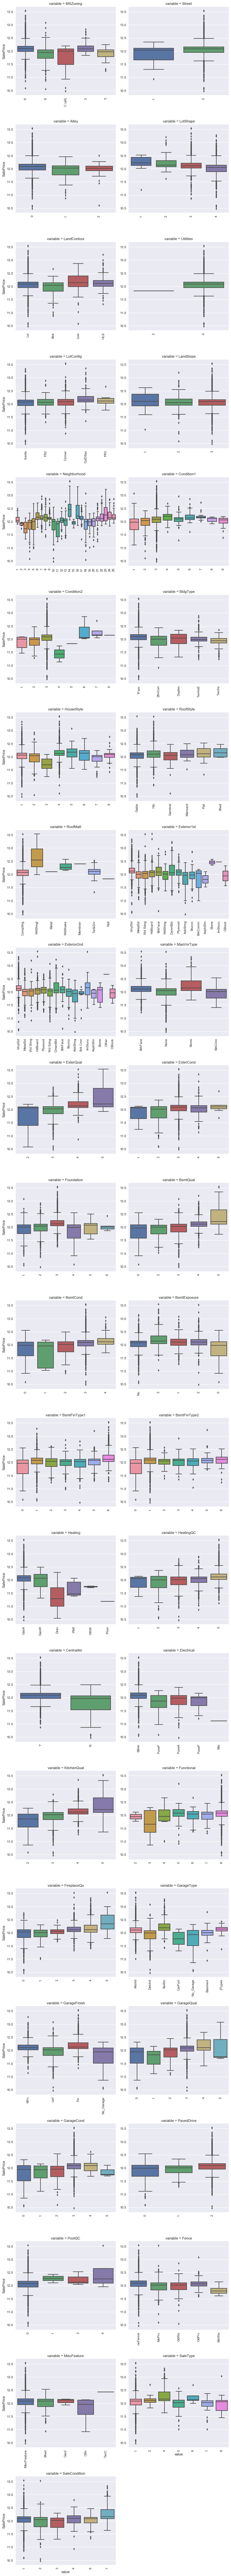

In [34]:
#start looking in detail to some features
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(all_data, id_vars=['SalePrice'], value_vars=catagorical)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

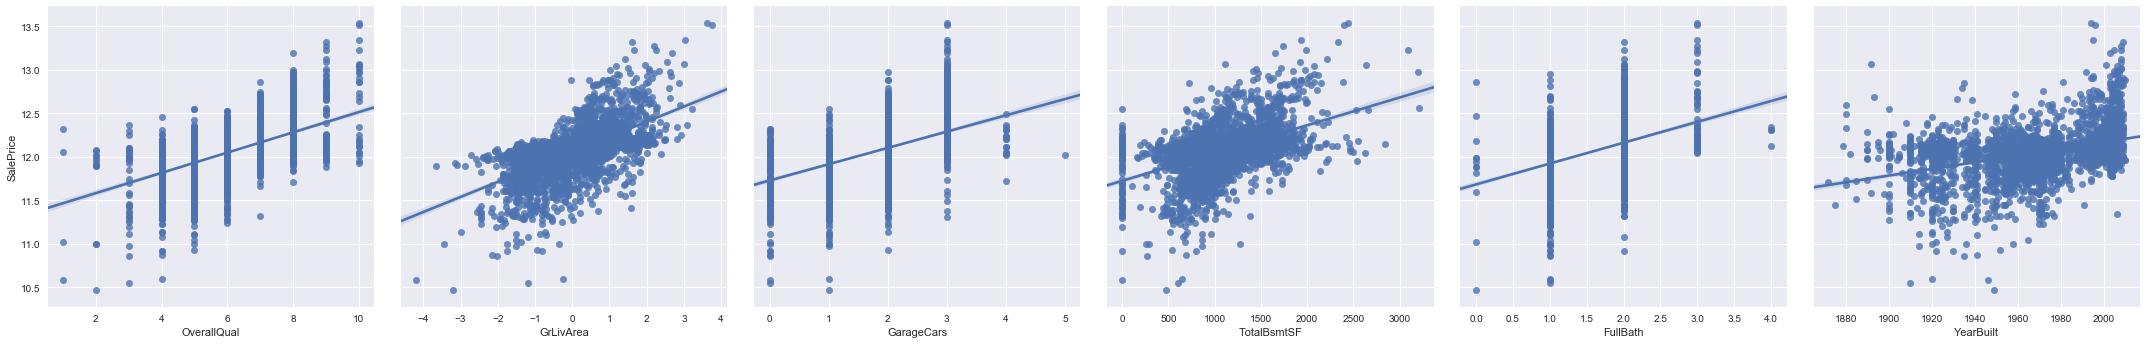

In [35]:
#scatterplot
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(all_data
             ,x_vars=cols
             , y_vars=["SalePrice"]
             , kind="reg",palette="husl",size=5)
#sns.pairplot(train, x_vars=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','bedbath'], y_vars=["SalePrice"], kind="scatter",palette="husl");

#plt.tight_layout()
plt.show()


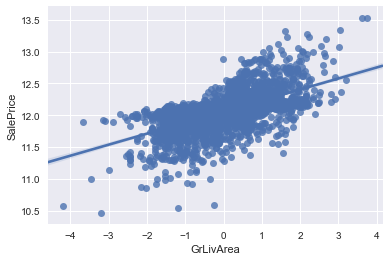

In [36]:
#price with overall/grage/ = liner 
g = sns.regplot(x="GrLivArea",y="SalePrice",data=all_data)

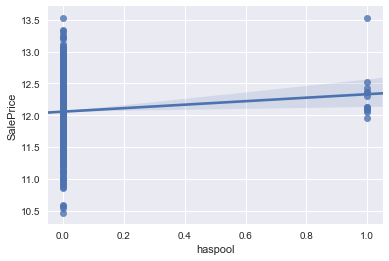

In [37]:
#price with overall/grage/ = liner 
g = sns.regplot(x="haspool",y="SalePrice",data=all_data)

In [38]:
all_data = all_data.drop(['MiscFeature','Fence','GarageFinish','GarageType','Electrical','CentralAir','Heating','BsmtExposure','Exterior1st','Exterior2nd','MasVnrType','Foundation','RoofMatl','RoofStyle','BldgType','LotConfig','LandContour','LowQualFinSF','MSZoning','BsmtFinSF1','BsmtFinSF2'], axis = 1)

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNetCV, LassoLarsCV, RidgeCV,LassoCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [40]:
y = all_data.SalePrice
x = all_data.drop(['SalePrice','Id'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(y.shape)
print(x.shape)
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(2912,)
(2912, 91)
(1951,)
(1951, 91)
(961,)
(961, 91)


In [41]:
#strat preparing for modling :parting the data using Kfold cross validation
#using k=10 foldes
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
#Validation function
#kf = KFold(n_splits=5, shuffle=True, random_state=42)
def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

def get_validation(model):
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def plot_hist_values_x_predictions(values, predictions):
    %pylab inline
    pylab.rcParams['figure.figsize'] = (20, 15)
    plt.hist([values, predictions], label=['Sale Price', 'Prediction'], bins=50)
    plt.legend(loc='upper right')
    plt.figure(figsize=(20,15))
    plt.show()

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation, linear_model
from sklearn.metrics import mean_squared_error
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
s1=error(y_test, predictions)
s2=np.sqrt(mean_squared_error(y_test, predictions))
print(s1,s2)


0.017023983324421628 0.20376659838246242


C:\Users\arsany\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
alphas2 = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]
lasso = LassoCV(max_iter=1e7, alphas=alphas2, random_state=42)
lasso.fit(X_train,y_train)
predictions2 = lasso.predict(X_test)
s1=error(y_test, predictions2)
s2=np.sqrt(mean_squared_error(y_test, predictions2))
print(s1,s2)


0.01720487058452701 0.2056428812789496


In [44]:
maxcoef = np.argsort(-np.abs(lasso.coef_))
coef = lasso.coef_[maxcoef]
for i in range(0, 15):
    print("{:.<025} {:< 010.4e}".format(X_train.columns[maxcoef[i]], coef[i]))


LotArea..................  4.0314e-02
OverallCond..............  1.5410e-02
KitchenAbvGr............. -8.5058e-03
MoSold...................  4.5474e-03
OverallQual^2............  2.6985e-03
FireplaceQu..............  1.7258e-03
TotRmsAbvGrd^2...........  1.3452e-03
AllPorchSF...............  1.2232e-04
TotalBsmtSF..............  1.0542e-04
GarageArea...............  4.7408e-05
GarageYrBlt..............  4.2584e-05
YearBuilt^2..............  3.6539e-07
YearRemodAdd^2...........  1.1990e-07
GrLivArea^2..............  4.1521e-08
MasVnrArea^2............. -2.0600e-08


In [45]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
from sklearn.preprocessing import StandardScaler
ridge=RidgeCV(alphas=alphas_alt)
ridge.fit(X_train,y_train)
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', RidgeCV(alphas=alphas_alt))
        ])

pipe.fit(X_train,y_train)
predictions3 = pipe.predict(X_test)
s1=error(y_test, predictions3)
s2=np.sqrt(mean_squared_error(y_test, predictions3))
print(s1,s2)

0.017017448220587903 0.20361095889565053


In [46]:

maxcoef = np.argsort(-np.abs(pipe.steps[1][1].coef_))
coef = pipe.steps[1][1].coef_[maxcoef]
for i in range(0, 15):
    print("{:.<025} {:< 010.4e}".format(X_train.columns[maxcoef[i]], coef[i]))

LotArea..................  5.3893e-02
PoolArea.................  4.8599e-02
haspool.................. -4.5585e-02
GrLivArea^2..............  4.2090e-02
OverallQual^2............  4.0957e-02
TotalBaths...............  4.0674e-02
hasgarage................  3.9587e-02
TotalBaths^2............. -3.4793e-02
hasfireplace............. -2.8593e-02
OverallCond..............  2.5541e-02
FullBath.................  2.4633e-02
logGrLivArea.............  2.4133e-02
1stFlrSF^2............... -2.3923e-02
KitchenAbvGr............. -2.3215e-02
Fireplaces...............  2.2242e-02


In [47]:
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
elasticnet=ElasticNetCV(max_iter=1e7, alphas=e_alphas, random_state=42, l1_ratio=e_l1ratio)
elasticnet.fit(X_train,y_train)

pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor',ElasticNetCV(max_iter=1e7, alphas=e_alphas, random_state=42, l1_ratio=e_l1ratio))
        ])

pipe.fit(X_train,y_train)
predictions4 = pipe.predict(X_test)
s1=error(y_test, predictions4)
s2=np.sqrt(mean_squared_error(y_test, predictions4))
print(s1,s2)

0.017012470148411264 0.20354012781576966


In [48]:
maxcoef = np.argsort(-np.abs(pipe.steps[1][1].coef_))
coef = pipe.steps[1][1].coef_[maxcoef]
for i in range(0, 15):
    print("{:.<025} {:< 010.4e}".format(X_train.columns[maxcoef[i]], coef[i]))

LotArea..................  5.3098e-02
logYearBuilt.............  4.3380e-02
GrLivArea^2..............  4.2937e-02
OverallQual^2............  3.3629e-02
logGrLivArea.............  3.2970e-02
OverallCond..............  2.3627e-02
TotalBaths...............  2.3544e-02
hasgarage................  2.3175e-02
KitchenAbvGr............. -2.2038e-02
KitchenQual..............  2.1902e-02
logTotRmsAbvGrd..........  1.6920e-02
BedroomAbvGr.............  1.5355e-02
TotalBsmtSF^2............  1.5139e-02
TotalBaths^2............. -1.4443e-02
MoSold...................  1.2962e-02


In [49]:
x = all_data[["GarageYrBlt","GarageArea","YearBuilt^2","GrLivArea^2","1stFlrSF^2","TotalBsmtSF^2","YearRemodAdd^2","KitchenAbvGr"
,"MasVnrArea^2","BsmtFinSF1^2","TotRmsAbvGrd^2","OverallQual^2","OverallCond","MoSold","LotArea","FireplaceQu","AllPorchSF","PoolArea"
,"TotalBaths"
]]
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [50]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


# build our model scoring function
def cv_rmse(model, X=x):
    rmse = np.sqrt(-cross_val_score(model,x, y,
                                    scoring="neg_mean_squared_error",
                                    cv=kf))
    return (rmse)

In [51]:
lm = LinearRegression()
s=cv_rmse(lm)
print("Accuracy: %0.2f (+/- %0.2f)" % (s.mean(), s.std() * 2))

Accuracy: 0.20 (+/- 0.03)


In [52]:
alphas2 = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
lasso = LassoCV(max_iter=1e7, alphas=alphas2, random_state=42,cv=kf)
s2 = cv_rmse(lasso)
print(s2.mean(), s2.std() * 2)

0.20393490595178748 0.03090460844609975


In [53]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas=alphas_alt,cv=kf))
score = cv_rmse(ridge)
print(score.mean(), score.std() * 2)

0.20394491486445662 0.030913807981449912


In [54]:
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas,
                                         random_state=42, l1_ratio=e_l1ratio))
score = cv_rmse(elasticnet)
print(score.mean(), score.std() * 2)

0.20397584884646064 0.030671990779975667


In [55]:
gbr = make_pipeline(RobustScaler(),GradientBoostingRegressor(n_estimators=5000, learning_rate=0.0005,
                                   max_depth=5, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =42))
score = cv_rmse(gbr)
print(score.mean(), score.std() * 2)

0.2102894868649126 0.03479486393953894


In [56]:
rf=make_pipeline(RobustScaler(),RandomForestRegressor(n_estimators=5000,
                                   max_depth=5,
                                   min_samples_leaf=15, min_samples_split=10, 
                                    random_state =42))
score = cv_rmse(rf)
print(score.mean(), score.std() * 2)

0.2109091990299799 0.029996629165496648


In [57]:
import xgboost as xgb
regr = xgb.XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.05,
                 max_depth=6,
                 min_child_weight=1.5,
                 n_estimators=7200,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)



In [58]:
lm.fit(x, y)
lasso.fit(x,y)
ridge.fit(x, y)
elasticnet.fit(x, y)
gbr.fit(x, y)
rf.fit(x, y)
regr.fit(x, y)

C:\Users\arsany\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\arsany\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=6,
       min_child_weight=1.5, missing=None, n_estimators=7200, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0.9,
       reg_lambda=0.6, scale_pos_weight=1, seed=42, silent=1,
       subsample=0.2)

In [59]:
p1= lm.predict(x)
p2= lasso.predict(x)
p3= ridge.predict(x)
p4= elasticnet.predict(x)
p5= gbr.predict(x)
p6= rf.predict(x)
p7= regr.predict(x)

In [60]:
s1= np.sqrt(mean_squared_error(y, p1))
s2= np.sqrt(mean_squared_error(y, p2))
s3= np.sqrt(mean_squared_error(y, p3))
s4= np.sqrt(mean_squared_error(y, p4))
s5= np.sqrt(mean_squared_error(y, p5))
s6= np.sqrt(mean_squared_error(y, p6))
s7= np.sqrt(mean_squared_error(y, p7))

In [61]:
print(s1.mean(), s1.std() * 2)
print(s2.mean(), s2.std() * 2)
print(s3.mean(), s3.std() * 2)
print(s4.mean(), s4.std() * 2)
print(s5.mean(), s5.std() * 2)
print(s6.mean(), s6.std() * 2)
print(s7.mean(), s7.std() * 2)

0.20244103511799638 0.0
0.2024546735086496 0.0
0.20244541076075737 0.0
0.20248089538306283 0.0
0.1887365285526284 0.0
0.19501566838192408 0.0
0.08054257622238335 0.0


In [62]:
def blend_models_predict(X):
    return (
            (0.05* gbr.predict(X)) + \
            (0.05* rf.predict(X)) + \
            (0.9* regr.predict(X)))

In [63]:
p8=blend_models_predict(x)
s8= np.sqrt(mean_squared_error(y, p8))
print(s8.mean(), s8.std() * 2)

0.08831381296394591 0.0


In [64]:
print(s7.mean(), s7.std() * 2)

0.08054257622238335 0.0


In [ ]:
plot_hist_values_x_predictions